## 主成分分析

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

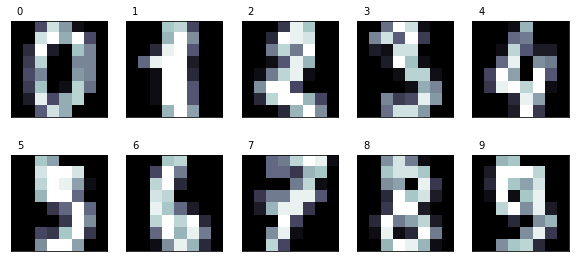

In [13]:
n_row, n_col = 2, 5

def plot_digits(images, y, max_n=10):
    """
        显示手写数字的图像
    """
    # 设置图像尺寸
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # 添加标签
        p.text(0, -1, str(y[i]))
        i = i + 1
    
plot_digits(digits.images, digits.target, max_n=10)

In [8]:
def plot_pca_scatter():
    """
        主成分显示
    """
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        # 只显示前两个主成分在二维坐标系中
        # 如果想显示前三个主成分，可以放在三维坐标系中。有兴趣的可以自己尝试下
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

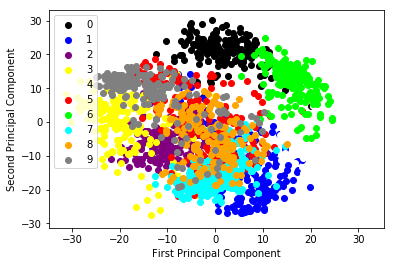

In [9]:
from sklearn.decomposition import PCA

n_components = 10 # 取前10个主成分
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_digits)
plot_pca_scatter()

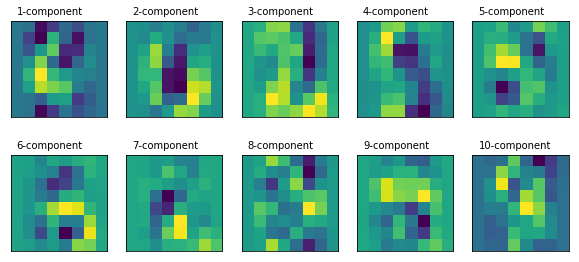

In [11]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())
        
print_pca_components(pca.components_[:n_components], n_col, n_row)

每幅图显示的是所有样本中计算出的1-10个主成分，不同的主成分描述了不同的特征。
比如第二幅图显示的是第2个特征向量，可以看出区别的是0和其他数字，因为0的中间是空的，其他数字则不是。
所以PCA可用于图像的特征提取。


课后思考：可以试着提取下人脸图像的主成分并显示查看